In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
submission_pattern = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
submission_pattern.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
print(train_data.describe(),'\n')
print(train_data.isnull().sum())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200   

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex

In [6]:
X = train_data.drop(['Name','Cabin','Ticket'],axis =1)

In [7]:
X = X.dropna()
X = pd.get_dummies(X).astype(int)
X.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22,1,0,7,0,1,0,0,1
1,2,1,1,38,1,0,71,1,0,1,0,0
2,3,1,3,26,0,0,7,1,0,0,0,1
3,4,1,1,35,1,0,53,1,0,0,0,1
4,5,0,3,35,0,0,8,0,1,0,0,1
6,7,0,1,54,0,0,51,0,1,0,0,1
7,8,0,3,2,3,1,21,0,1,0,0,1
8,9,1,3,27,0,2,11,1,0,0,0,1
9,10,1,2,14,1,0,30,1,0,1,0,0
10,11,1,3,4,1,1,16,1,0,0,0,1


In [8]:
y = X.Survived
X= X.drop(['Survived'],axis=1)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain,Xval,ytrain,yval =   train_test_split(X,y,test_size= 0.2, random_state = 420)

In [9]:
from sklearn.metrics import accuracy_score
estimators = [50,70,100,200,300,400,500]
train_acc=[]
val_acc = []
for i in estimators:
    model_new = RandomForestClassifier(n_estimators = i,max_depth = 5,min_samples_split=5,random_state = 10)
    model_new.fit(Xtrain,ytrain)
    t_acc = accuracy_score(ytrain,model_new.predict(Xtrain))
    v_acc = accuracy_score(yval,model_new.predict(Xval))
    train_acc.append(t_acc)
    val_acc.append(v_acc)

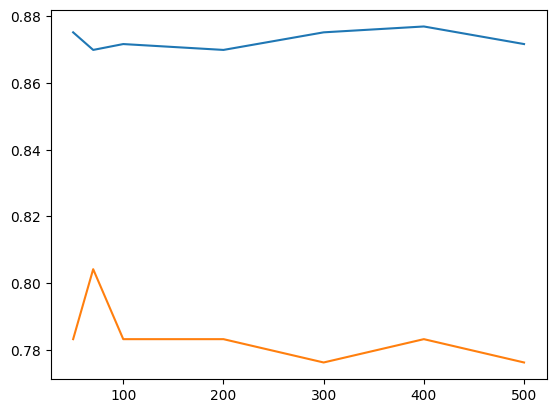

In [10]:
import matplotlib.pyplot as plt
plt.plot(estimators,train_acc,label='Training accuracy')
plt.plot(estimators,val_acc,label='validation accuracy')


In [11]:
print(train_acc[1],'\n')
print(val_acc[1],'\n')

0.8699472759226714 

0.8041958041958042 



In [12]:
X_test = test_data.drop(['Name','Cabin','Ticket'],axis =1)
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean())
X_test = pd.get_dummies(X_test).astype(int)


In [13]:
best_model = RandomForestClassifier(n_estimators = 70,max_depth = 5,min_samples_split=5,random_state = 10)
best_model.fit(Xtrain,ytrain)
preds = best_model.predict(X_test)
preds.shape

(418,)

In [14]:
ids = X_test['PassengerId'].values
ans = pd.DataFrame({'PassengerId': ids, 'Survived': preds})
ans.to_csv('Submission.csv',index=False)
ans.head(20)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
